# Study of [EPIC246067459](https://exofop.ipac.caltech.edu/k2/edit_target.php?id=246067459)

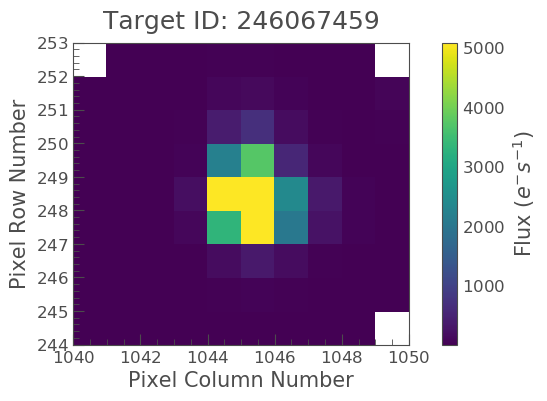

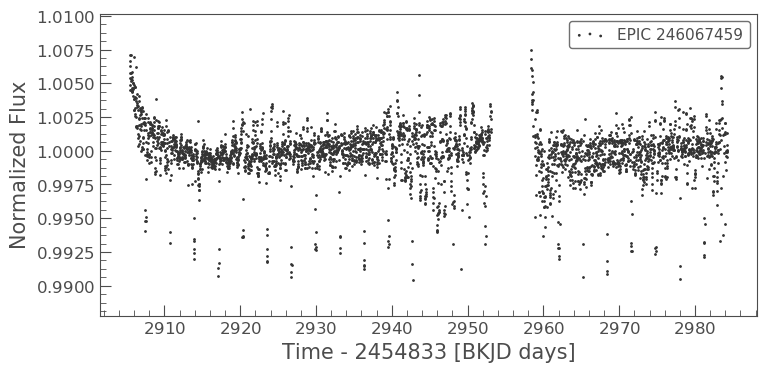

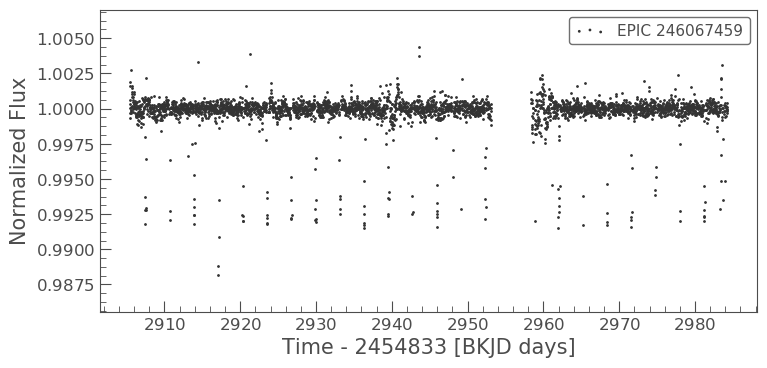

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from lightkurve import search_lightcurvefile
from lightkurve import search_targetpixelfile
from astropy.stats import BoxLeastSquares
import matplotlib.pyplot as plt
import math

target = '246067459'

tpf = search_targetpixelfile(target).download()
tpf.plot()
lc = search_lightcurvefile(target).download().PDCSAP_FLUX.remove_nans().remove_outliers()
lc.scatter()
corr_lc = lc.to_corrector("sff").correct(windows=40)
corr_lc_f, trend = corr_lc.flatten(window_length=401, return_trend=True)
corr_lc_f.scatter()

Best Fit Period: 3.2046 days


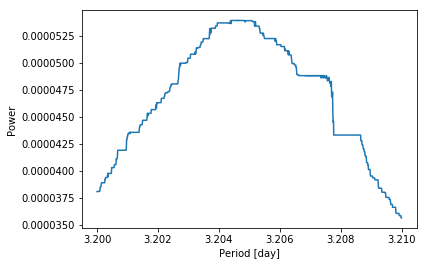

In [11]:
bls = BoxLeastSquares(corr_lc_f.time, corr_lc_f.flux, corr_lc_f.flux_err)
periods = np.arange(3.2, 3.21, 0.00001)
durations = np.arange(0.005, 0.15, 0.001)
periodogram = bls.power(periods, durations)

plt.plot(periodogram.period, periodogram.power)
plt.ylabel("Power")
plt.xlabel("Period [day]");

period = periods[np.argmax(periodogram.power)]
print('Best Fit Period: {:0.4f} days'.format(period))

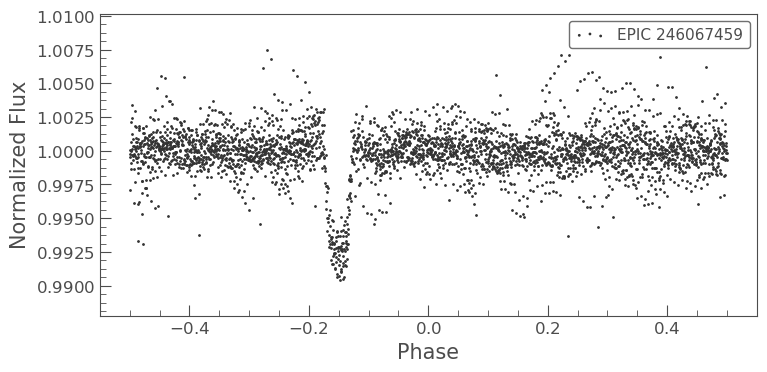

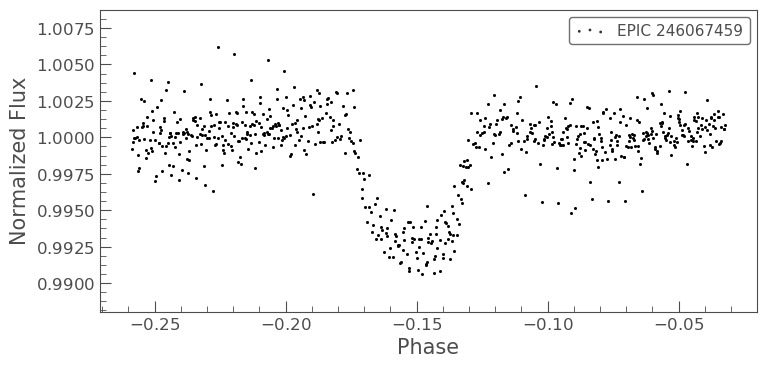

In [17]:
period_f = period
lcf = lc.fold(period=period_f,t0=1.4)
lcf.scatter()
lc_transit = lcf[800:1500].normalize()
lc_transit.scatter()
lcf.time_format = 'jd'
period_f
plt.scatter(lc_transit.time, lc_transit.flux, s=1, c='k')
plt.savefig('transit.png')

In [28]:
R_star = 0.876 # in sun's radius
R_star = R_star * 695510000 # in meter

Td_values = lc_transit.time[lc_transit.flux < 0.995]
Td = Td_values[-1] - Td_values[0]

min_tr = lc_transit.flux[lc_transit.flux < 0.993].mean()
R_planet = math.sqrt(1-min_tr)*R_star
R_planet = R_planet / 69911000 # in jupiter's radius

Td , R_planet*11.2

(0.07794559189403572, 8.725540294742565)

In [29]:
G = 6.67408 * 10**(-11)
P = period_f*86400
M = 1.093*1.98847*10**30
a = (G*M*P**2/(2*math.pi)**2) ** (1./3)
i = math.acos(math.sqrt((R_star/a)**2 - (Td*math.pi/P)**2)) # in radians
b = a * math.cos(i)

a = a / 149597870700 # astronomical unit
b = b / R_star
i = math.degrees(i)

a, i, b

(0.04381859023216154, 84.6669754524206, 0.9999999999547291)

In [30]:
u1 = 0.30495
u2 = 0.3095
µ = math.cos(math.asin(b))

I_µ = 1 - u1*(1-µ) - u2*((1-µ)**2)

I_µ, µ

(0.38555879167527213, 9.515345305384026e-06)

In [31]:
R_planet = R_planet * 69911000
R_planet = math.sqrt((1-min(lc_transit.flux))/I_µ)*R_star
R_planet = R_planet / 69911000

R_planet*11.2

15.204543494633542